In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [7]:
data=pd.read_csv("datasets/train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data=scalar(data)

In [32]:
label= data['label']
label=np.array(label)
label=target.reshape(label.shape[0],1)

pixels=data.drop('label',axis=1)
pixels=np.array(pixels)

In [33]:
features.shape

(42000, 784)

In [34]:
weights0=np.random.rand(pixels.shape[1],1)
bias0=np.random.rand(1,1)

In [57]:
def linear_model(m,x,c):
    return np.matmul(x,m)+c

def error(m,x,c,y):
    return np.mean((linear_model(m,x,x)-y)**2)/100

def derivative_wrt_weights(m,x,c,y):
    derivatives=2*np.mean(np.multiply(x,linear_model(m,x,c)-y),axis=0)
    derivatives= np.array(derivatives)
    derivatives=derivatives.reshape(pixels.shape[1],1)
    return derivatives
     

def derivative_wrt_bias(m,x,c,y):
    derivative=2*np.mean(linear_model(m,x,c)-y)
    derivative= np.array(derivative)
    derivative=derivative.reshape(1,1)
    return derivative

def scalar(x):
    return (x-np.mean(x))/(np.std(x)+.000001)   

def accuracy(m,x,c,y):
    currentError = error(m,pixels,c,y)
    maxError = np.mean(y**2)
    return (1-(currentError / maxError))*100

In [50]:
def model_result(alpha,num_of_iteration):
    weights=weights0
    bias=bias0
    error_cost=[]
    for i in range(num_of_iteration):
        weights = weights - alpha * derivative_wrt_weights(weights,pixels,bias,label)
        bias = bias - alpha * derivative_wrt_bias(weights,pixels,bias,label)
        error_cost.append(error(weights,pixels,bias,label))
        clear_output(True)
        print("In Iteration ",i,"\n Accuracy is: ",accuracy(weights,pixels,bias,label))
        print("Error is: ",error(weights,pixels,bias,label))
    plt.plot(error_cost)

Accuracy is:  -290.49874042983004
Error is:  3.904984699731441


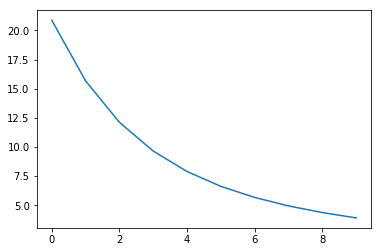

In [56]:
model_result(alpha= .0025,num_of_iteration=10)

In [60]:
error(weights0,pixels,bias0,label)

28.633822067171504

In [71]:
np.mean(label**2)

0.999999307407021

In [70]:
accuracy(weights0,pixels,bias0,label)

currentError :  28.633822067171504
maxError : 0.999999307407021
28.633841898769365
-27.633841898769365


-2763.3841898769365

In [69]:
def accuracy(m,x,c,y):
    currentError = error(m,pixels,c,label)
    maxError = np.mean(label**2)
    
    print("currentError : ",currentError)
    print("maxError :",maxError)    
    print(currentError / maxError)
    print(1-(currentError / maxError))
    
    return (1-(currentError / maxError))*100